predicted age: (0, 2)


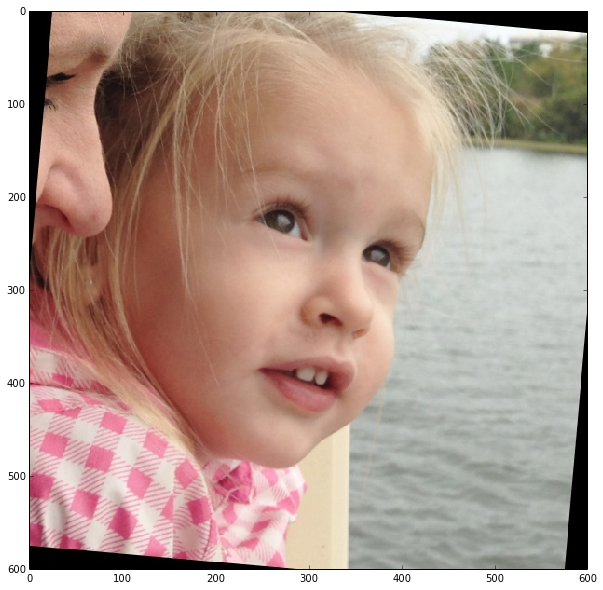

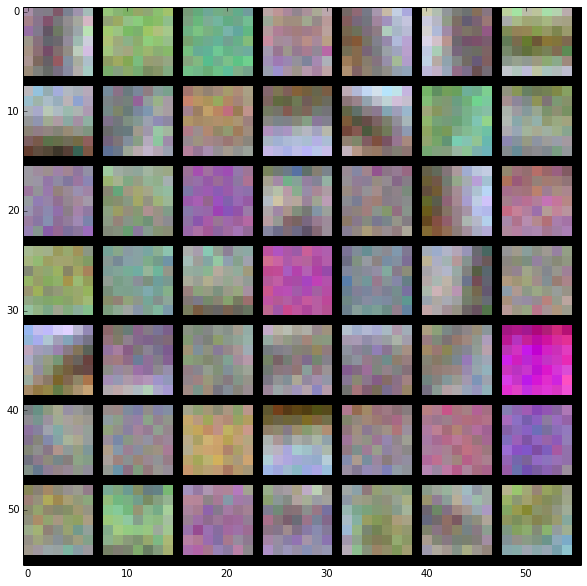

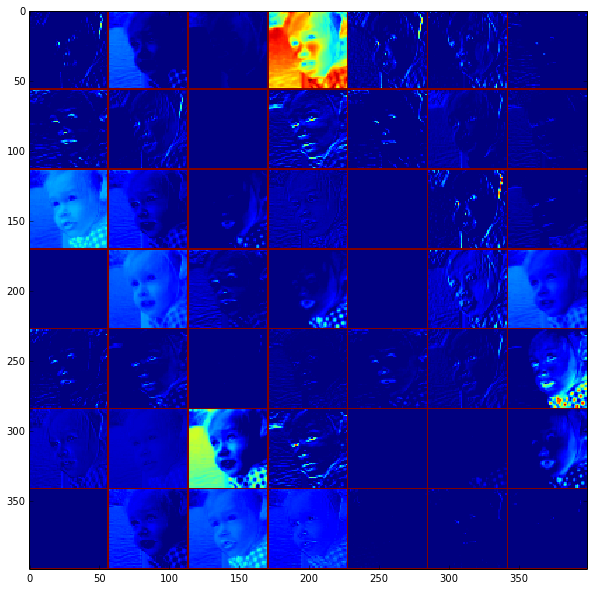

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

caffe_root = '../caffe-master/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

age_net_pretrained='../age_net.caffemodel'
age_net_model_file='../deploy_age.prototxt'
age_net = caffe.Classifier(age_net_model_file, age_net_pretrained,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))


age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']

example_image = '../example_image.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

prediction = age_net.predict([input_image]) 

print 'predicted age:', age_list[prediction[0].argmax()]


def showimage(im):
    if im.ndim == 3:
        im = im[:, :, ::-1]
    plt.set_cmap('jet')
    plt.imshow(im)
    

def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    #showimage(data)
    plt.figure()
    plt.set_cmap('jet')
    plt.imshow(data)


filters = age_net.params['conv1'][0].data[:49]
vis_square(filters.transpose(0, 2, 3, 1))

feat = age_net.blobs['conv1'].data[0, :49]
vis_square(feat, padval=1)